In [118]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='sans-serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
savepath = "/Users/saadjansari/Desktop/Meetings/Flatiron/Flatiron 200917"
plt.close('all')

In [119]:
files = [
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf01_d10/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf01_d15/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf01_d20/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf01_d25/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf01_d30/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf02_d10/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf02_d15/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf02_d20/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf02_d25/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf02_d30/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf04_d10/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf04_d15/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf04_d20/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf04_d25/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf04_d30/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf08_d10/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf08_d15/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf08_d20/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf08_d25/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf08_d30/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf16_d10/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf16_d15/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf16_d20/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf16_d25/s0",
        "/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Confinement/scan_d_pf/pf16_d30/s0",
        ]

diction = {
    'path': files,
    'packing_fraction': np.array([1,1,1,1,1,2,2,2,2,2,4,4,4,4,4,8,8,8,8,8,16,16,16,16,16])/1.0,
    'confining_diameter': np.array([1.0, 1.5, 2.0,2.5,3.0,1.0, 1.5, 2.0,2.5,3.0,1.0, 1.5, 2.0,2.5,3.0,
                                   1.0, 1.5, 2.0,2.5,3.0,1.0, 1.5, 2.0,2.5,3.0])
}

# labels
labs = []
for idx in range( len(files)):
    labs += ['pf = {0}%, d = {1}'.format(diction['packing_fraction'][idx], diction['confining_diameter'][idx])]
diction['labels'] = labs

df = pd.DataFrame(data=diction)
df.head()

,path,packing_fraction,confining_diameter,labels
0,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.0,"pf = 1.0%, d = 1.0"
1,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.5,"pf = 1.0%, d = 1.5"
2,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,2.0,"pf = 1.0%, d = 2.0"
3,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,2.5,"pf = 1.0%, d = 2.5"
4,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,3.0,"pf = 1.0%, d = 3.0"


In [125]:
S = np.zeros( len(df.index))
Serr = np.zeros( len(df.index))

for idx in range( len(df.index)):
    
    fpath = df.path[idx]
    dat = pickle.load( open( os.path.join(fpath, 'data.pickle'), "rb" ) )
    
    st_pt = dat['params']['nT'] - int(np.ceil(10/dat['params']['dt']))
    # Nematic order
    S[idx] = np.mean( dat['S_cluster'][st_pt::])
    Serr[idx] = np.std( dat['S_cluster'][st_pt::])

df['S'] = S
df['Serr'] = Serr

S = np.zeros( len(df.index))
Serr = np.zeros( len(df.index))

for idx in range( len(df.index)):
    
    fpath = df.path[idx]
    dat = pickle.load( open( os.path.join(fpath, 'data.pickle'), "rb" ) )
    
    st_pt = dat['params']['nT'] - int(np.ceil(10/dat['params']['dt']))
    # Nematic order
    S[idx] = np.mean( dat['S_bulk'][st_pt::])
    Serr[idx] = np.std( dat['S_bulk'][st_pt::])

df['S_bulk'] = S
df['Serr_bulk'] = Serr
df.head()

,path,packing_fraction,confining_diameter,labels,S,Serr,S_bulk,Serr_bulk
0,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.0,"pf = 1.0%, d = 1.0",0.724620,0.053179,0.788390,0.108084
1,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,1.5,"pf = 1.0%, d = 1.5",0.540279,0.137408,0.404346,0.121355
2,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,2.0,"pf = 1.0%, d = 2.0",0.426865,0.124696,0.276481,0.087377
3,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,2.5,"pf = 1.0%, d = 2.5",0.279146,0.008495,0.211776,0.068532
4,/Users/saadjansari/Documents/Projects/AMSOS/re...,1.0,3.0,"pf = 1.0%, d = 3.0",0.214403,0.011687,0.159698,0.050418


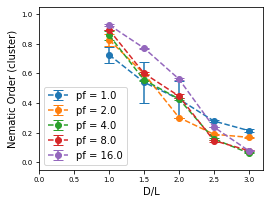

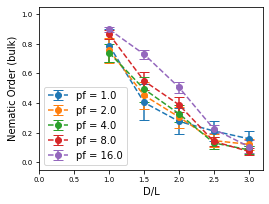

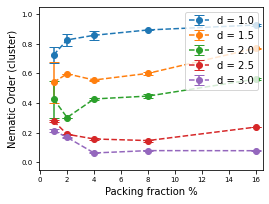

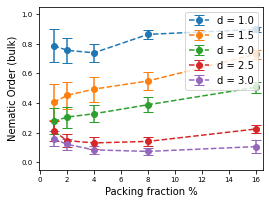

In [126]:
pf_list = df.packing_fraction.unique()
d_list = df.confining_diameter.unique()

# Confining diameter (Cluster and Bulk)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(pf_list)):
    # Get sims with just these packing fractions
    df1 = df[ df['packing_fraction'] == pf_list[idx] ]
    lab = 'pf = {0}'.format( df1.packing_fraction.tolist()[0] )
    ax.errorbar(df1.confining_diameter, df1.S, yerr=df1.Serr, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('D/L')
ax.set_ylabel('Nematic Order (cluster)')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[-0, 3.2])
plt.savefig(os.path.join(savepath, "Scluster_vs_diameter.pdf"))

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(pf_list)):
    # Get sims with just these packing fractions
    df1 = df[ df['packing_fraction'] == pf_list[idx] ]
    lab = 'pf = {0}'.format( df1.packing_fraction.tolist()[0] )
    ax.errorbar(df1.confining_diameter, df1.S_bulk, yerr=df1.Serr_bulk, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('D/L')
ax.set_ylabel('Nematic Order (bulk)')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[-0, 3.2])
plt.savefig(os.path.join(savepath, "Sbulk_vs_diameter.pdf"))

# Packing fraction (Cluster and Bulk)
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(d_list)):
    
    # Get sims with just these confining diameters
    df1 = df[ df['confining_diameter'] == d_list[idx] ]
    lab = 'd = {0}'.format( df1.confining_diameter.tolist()[0] )
    ax.errorbar(df1.packing_fraction, df1.S, yerr=df1.Serr, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('Packing fraction %')
ax.set_ylabel('Nematic Order (cluster)')
plt.legend(loc=1)
ax.set(ylim=[-0.05,1.05], xlim=[-0.05, 16.5])
plt.savefig(os.path.join(savepath, "Scluster_vs_pf.pdf"))


fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)
for idx in range(len(d_list)):
    
    # Get sims with just these confining diameters
    df1 = df[ df['confining_diameter'] == d_list[idx] ]
    lab = 'd = {0}'.format( df1.confining_diameter.tolist()[0] )
    ax.errorbar(df1.packing_fraction, df1.S_bulk, yerr=df1.Serr_bulk, ls='--', 
                marker='o', capsize=5, capthick=1, label=lab)

ax.set_xlabel('Packing fraction %')
ax.set_ylabel('Nematic Order (bulk)')
plt.legend(loc=1)
ax.set(ylim=[-0.05,1.05], xlim=[-0.05, 16.5])
plt.savefig(os.path.join(savepath, "Sbulk_vs_pf.pdf"))

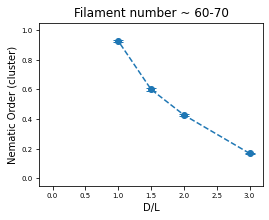

In [127]:
# Sims with n_filaments ~ 60-70
pf_list = [2.0, 4.0, 8.0, 16.0]
d_list = [3.0, 2.0, 1.5, 1.0]

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

Stemp = []
Serrtemp = []
# Get sims with just these confining diameters
for idx in range( len(d_list)):
    df1 = df[ (df.packing_fraction == pf_list[idx]) & (df.confining_diameter == d_list[idx] )]
    Stemp.append( df1.S.tolist()[0])
    Serrtemp.append( df1.Serr.tolist()[0])
    
ax.errorbar(d_list, Stemp, yerr=Serrtemp, ls='--', 
            marker='o', capsize=5, capthick=1)

ax.set_xlabel('D/L')
ax.set_ylabel('Nematic Order (cluster)')
ax.set(ylim=[-0.05,1.05], xlim=[-0.2, 3.2])
ax.set(title='Filament number ~ 60-70')
plt.savefig(os.path.join(savepath, "S_diameter_n60.pdf"))